In [27]:
import numpy as np

demo_data = np.load("data/Omniscient/expert_demo.npy")


demo_data

array([[ 5.31215800e+00,  1.96487774e+00,  0.00000000e+00,
         0.00000000e+00, -1.00000000e+00, -2.04050354e+00,
         1.00000000e+00,  5.31215703e+00,  1.96487812e+00,
        -8.33276404e-09, -8.51628884e-10,  1.00000000e+00,
         2.45457512e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.31215703e+00,  1.96487812e+00, -8.33276404e-09,
        -8.51628884e-10,  1.00000000e+00,  2.45457512e+00,
         1.00000000e+00,  5.31215714e+00,  1.96487981e+00,
         6.40624598e-10,  5.24238316e-09,  1.00000000e+00,
         2.95764498e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.31215714e+00,  1.96487981e+00,  6.40624598e-10,
         5.24238316e-09,  1.00000000e+00,  2.95764498e+00,
         1.00000000e+00,  5.31215708e+00,  1.96488150e+00,
         2.29158768e-09, -1.13101577e-08,  1.00000000e+00,
        -2.71468426e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.31215708e+00,  1.96488150e+00,  2.29158768e-09,
        -1.13101577e-08,  1.00000000e+00, -2.71468426

In [4]:
from typing import Tuple
class DataLoader:
    def __init__(self, buffer=None, batch_size=64, max_buffer_size=100, seed=None):
        if buffer:
            self.buffer = buffer
        else:
            self.buffer = []
        self.batch_size = batch_size
        self.max_buffer_size = max_buffer_size  # Number of episodes.
        self.indexes = None
        self.specify_data_tuple((0, 6), (6, 9), (9, 15), (15, 16), (16, 17))
        self.seed = seed

    def append(self, traj):
        """

        Parameters
        ----------
        traj : ndarray
            2-d numpy array with (time, data_dim). data dim is the shape of the (s, a, s', r, end)

        Returns
        -------

        """
        self.buffer.append(traj)
        if len(self.buffer) > self.max_buffer_size:
            self.buffer.pop(0)
        return None

    def specify_data_tuple(self, s: Tuple[int, int], a: Tuple[int, int], snext: Tuple[int, int], r: Tuple[int, int],
                           end: Tuple[int, int]):
        self.indexes = (s, a, snext, r, end)
        return None

    def sample(self):

        assert self.indexes is not None
        Ntrajs = len(self.buffer)
        assert Ntrajs > 0

        all_trajs = np.vstack(self.buffer)  #  -> (samples, data_dim)
        Nsamp = all_trajs.shape[0]

        np.random.seed(self.seed)
        randinds = np.random.permutation(Nsamp)
        self.seed += 1
        data = torch.from_numpy(all_trajs).to(torch.float32)

        s = data[:, self.indexes[0][0]:self.indexes[0][1]]
        a = data[:, self.indexes[1][0]:self.indexes[1][1]]
        snext = data[:, self.indexes[2][0]:self.indexes[2][1]]
        r = data[:, self.indexes[3][0]:self.indexes[3][1]]
        end = data[:, self.indexes[4][0]:self.indexes[4][1]]

        inds = np.arange(0, Nsamp, self.batch_size)
        inds = np.append(inds, Nsamp)

        for i in range(len(inds) - 1):
            selected_inds = randinds[inds[i]:inds[i+1]]
            data_tuple = (s[selected_inds, :], a[selected_inds, :], snext[selected_inds, :], r[selected_inds, :], end[selected_inds, :])
            yield data_tuple

In [5]:
import torch
import numpy as np
data_dim = 17

dl = DataLoader(seed=0)

for _ in range(201):
    foo = np.random.rand(50, data_dim)
    dl.append(foo)


In [13]:
foo = torch.rand(10, 10)
foo[5:6, :].shape

torch.Size([1, 10])

In [8]:
for s, a, snext, r, end in dl.sample():
    print(s.shape)
    print(a.shape)
    print(snext.shape)
    print(r.shape)
    print(end.shape)
    break


torch.Size([64, 6])
torch.Size([64, 3])
torch.Size([64, 6])
torch.Size([64, 1])
torch.Size([64, 1])


In [8]:
torch.from_numpy(np.array([1, 2, 3.0])).to(torch.float32)

tensor([1., 2., 3.])

C:\Users\Hoi\AppData\Local\Temp\ipykernel_5576\1149887971.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


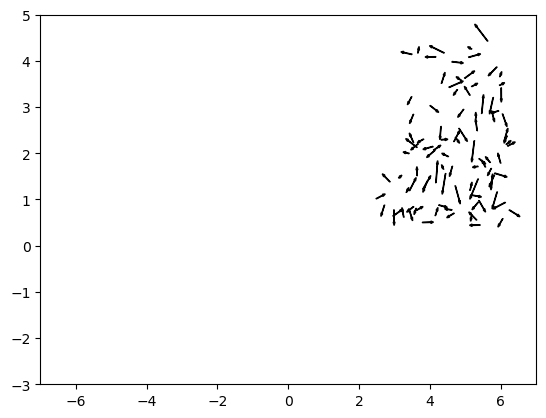

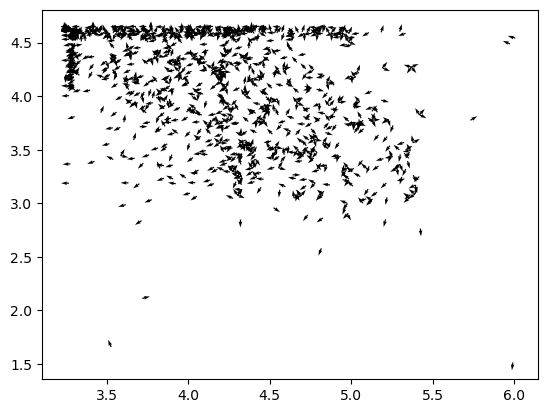

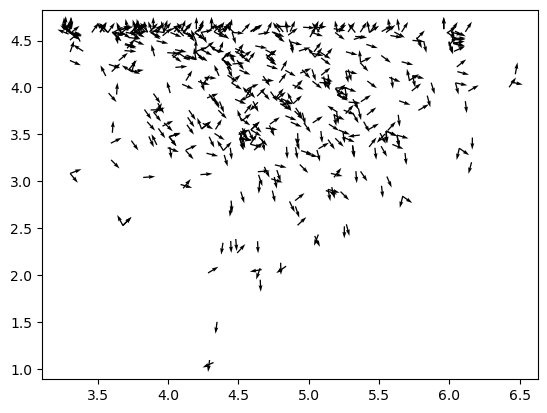

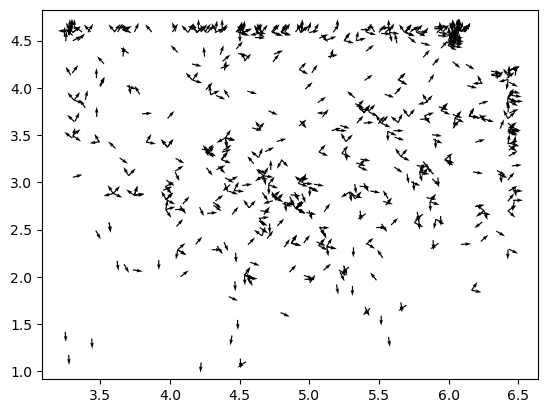

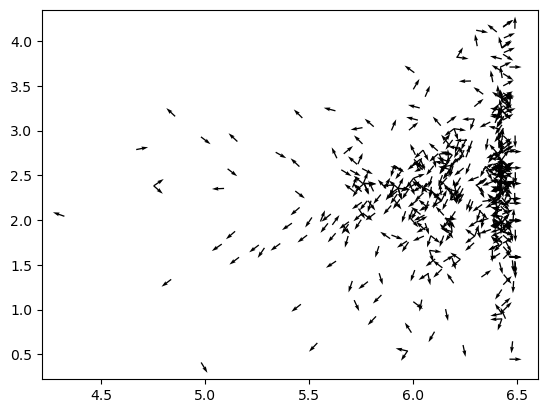

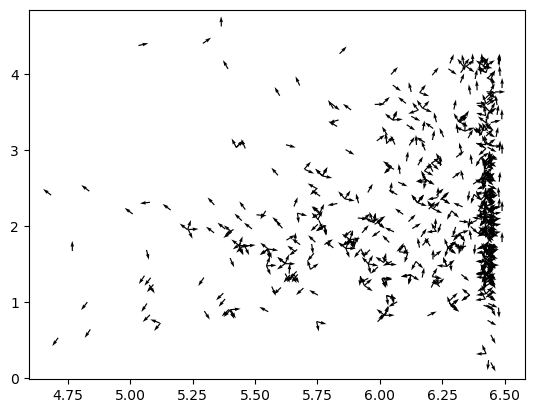

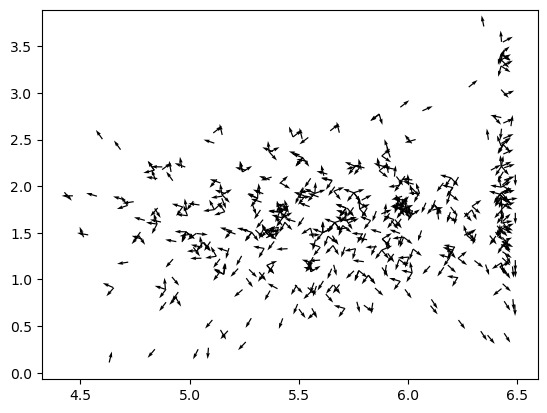

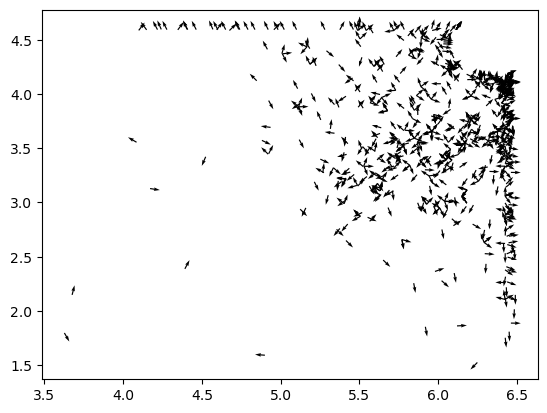

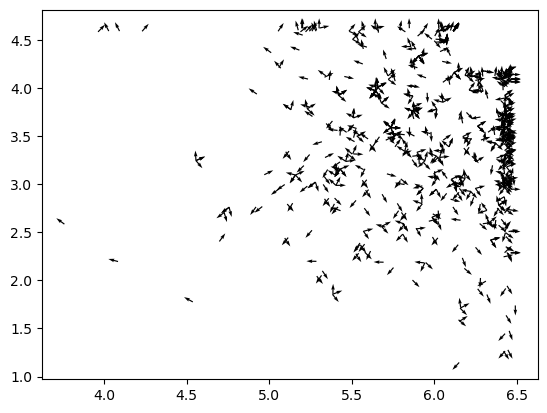

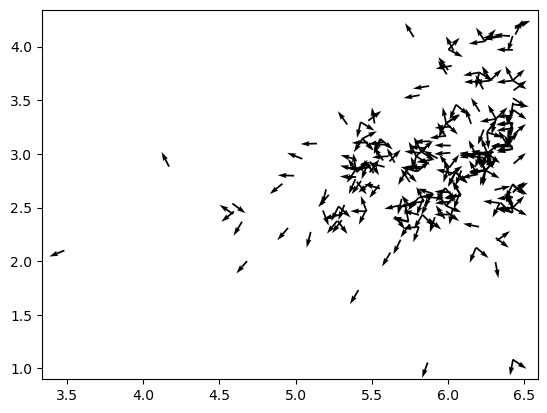

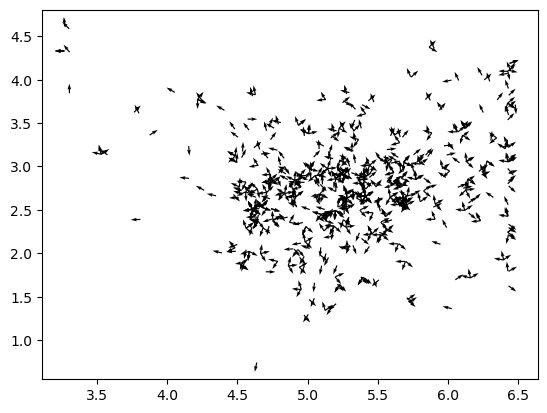

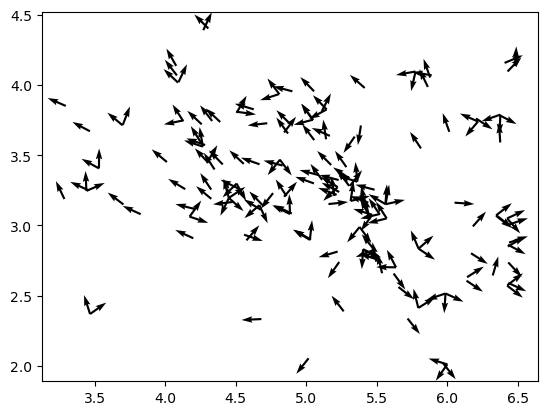

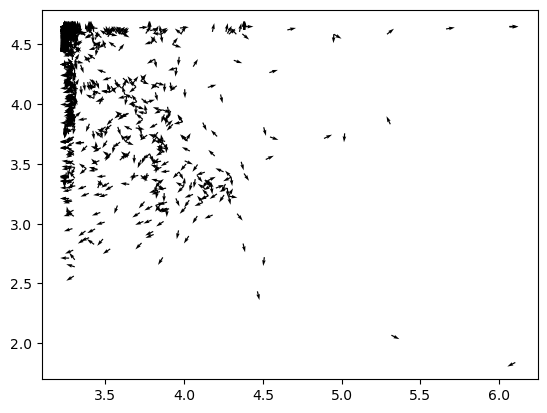

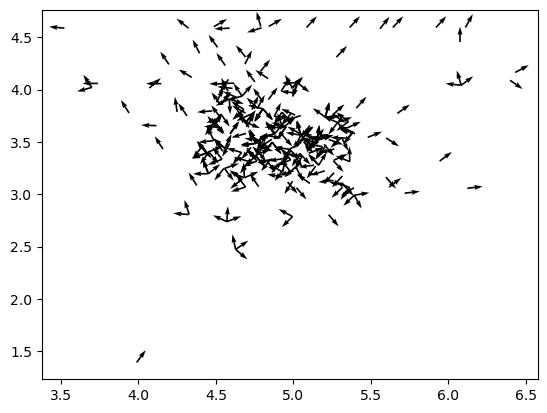

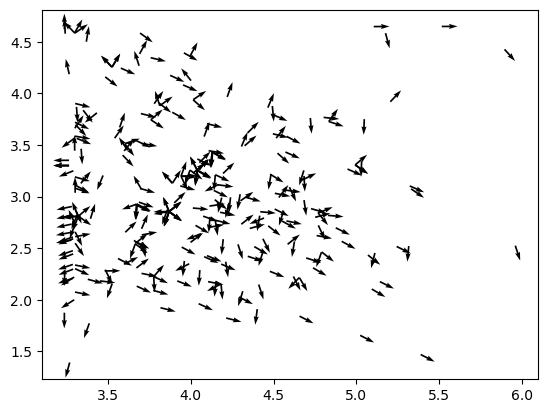

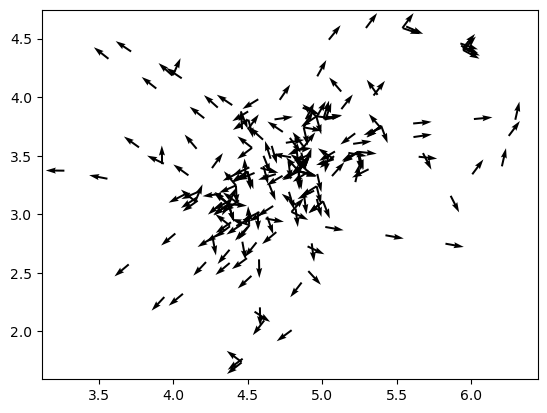

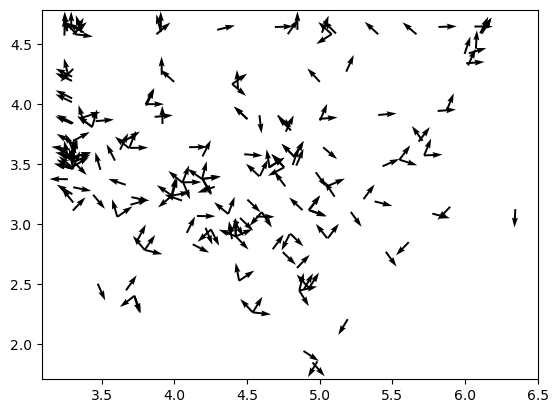

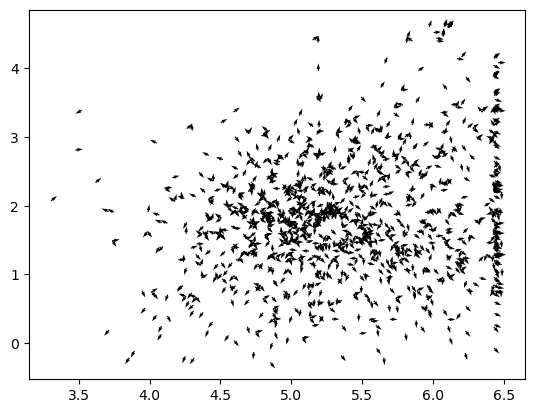

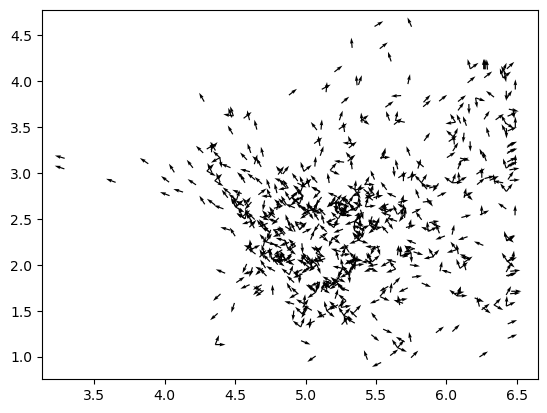

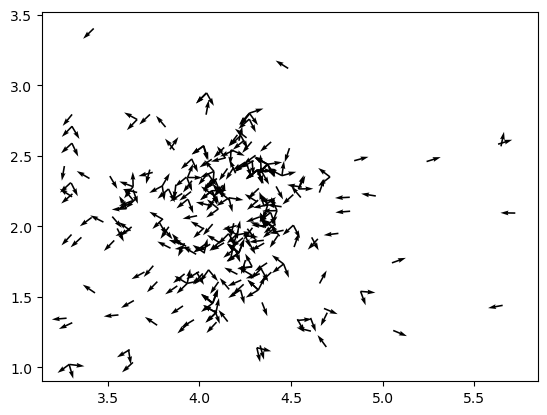

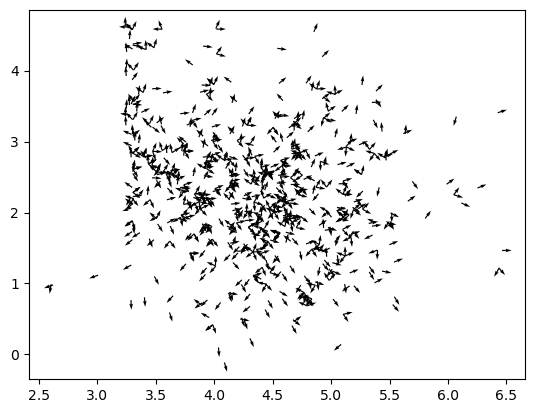

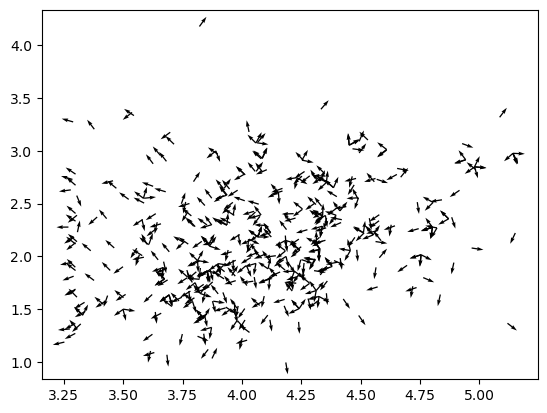

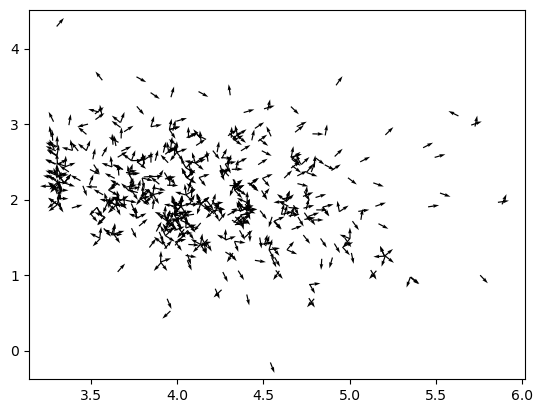

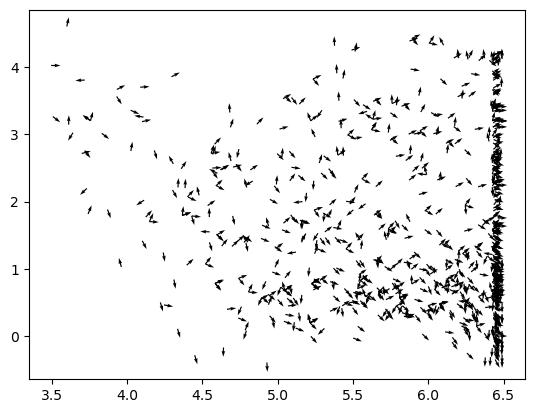

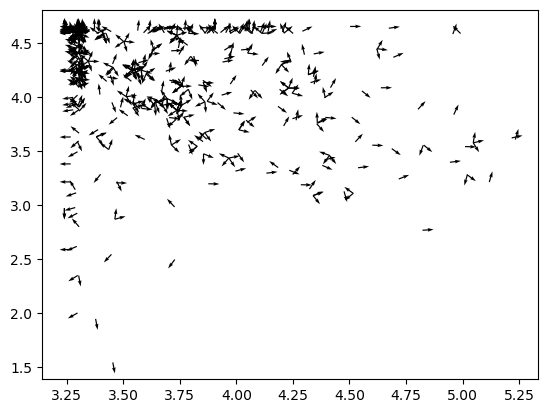

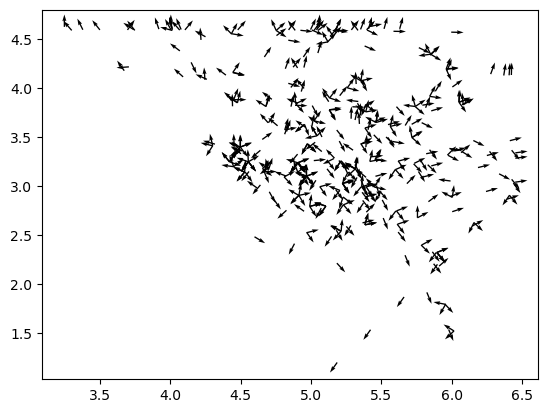

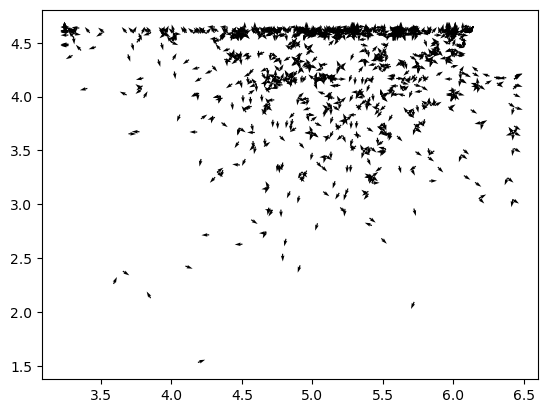

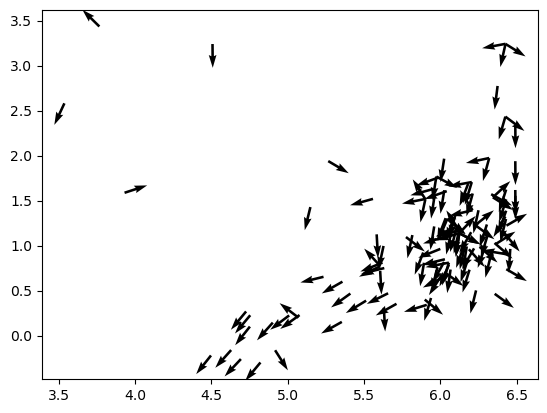

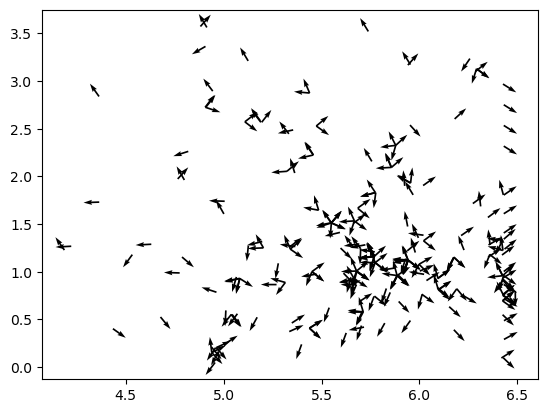

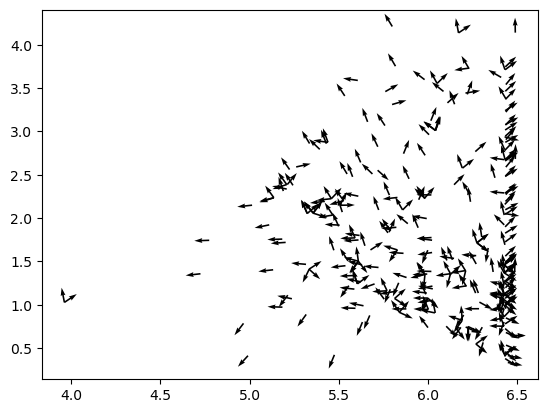

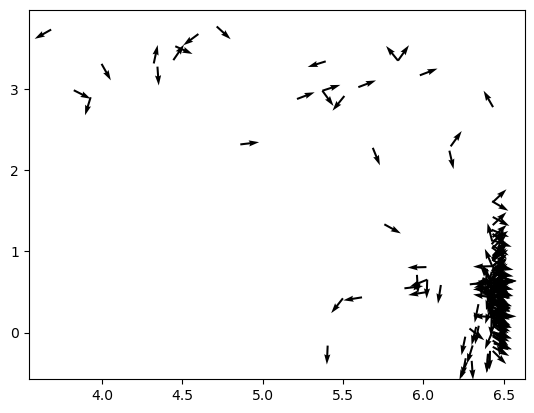

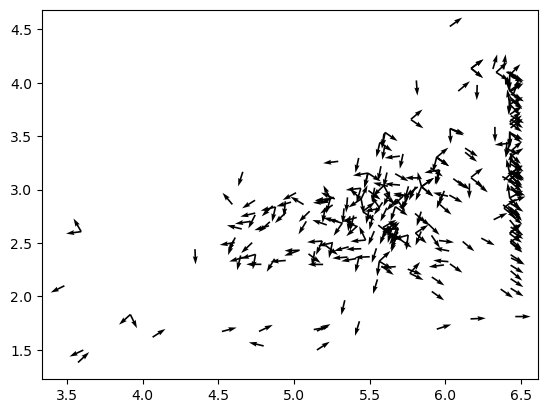

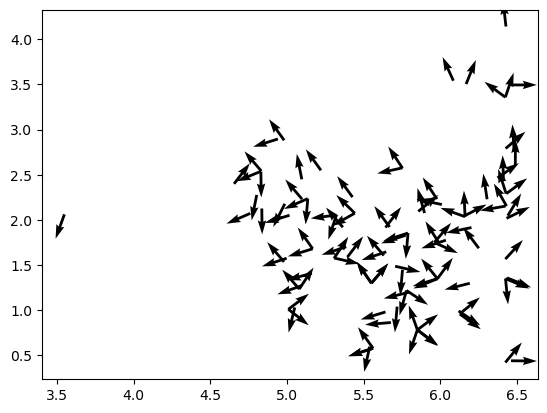

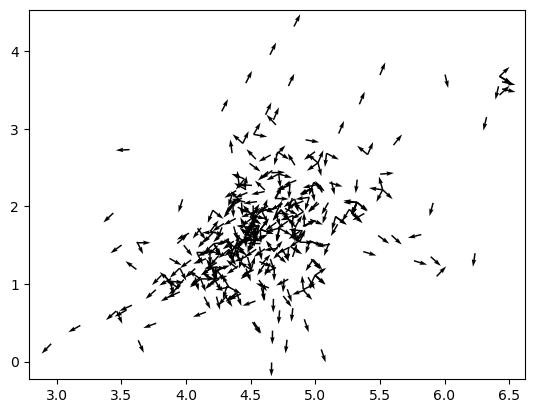

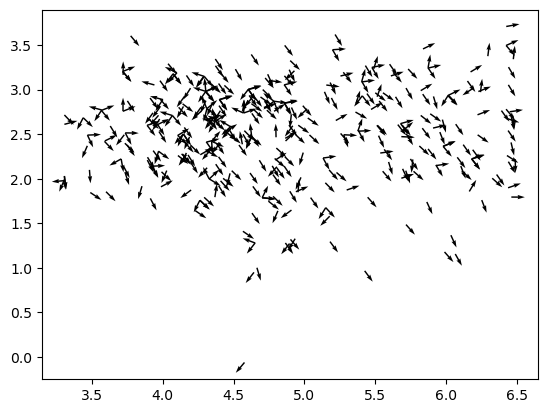

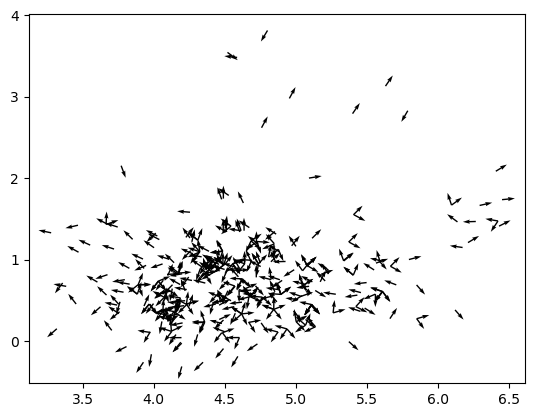

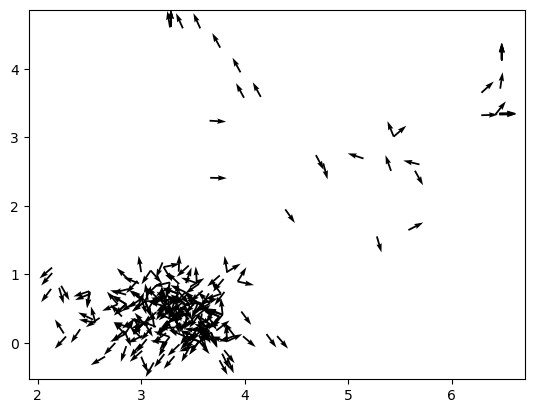

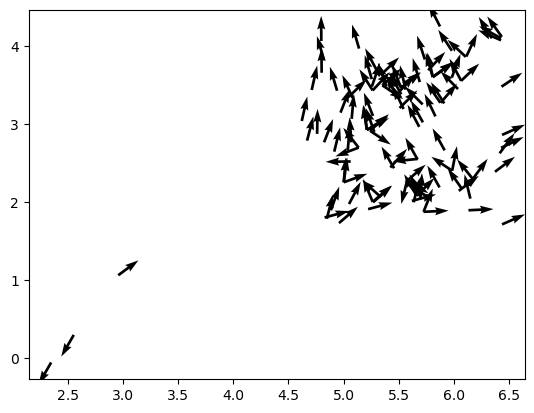

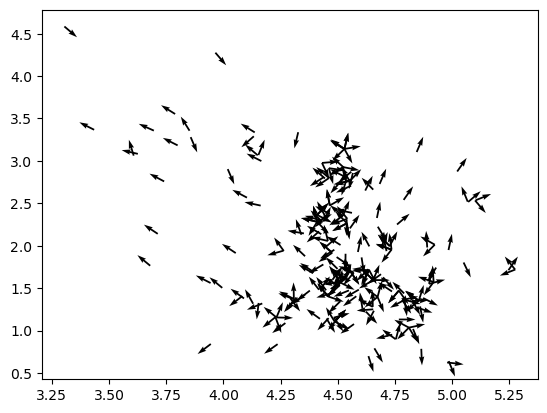

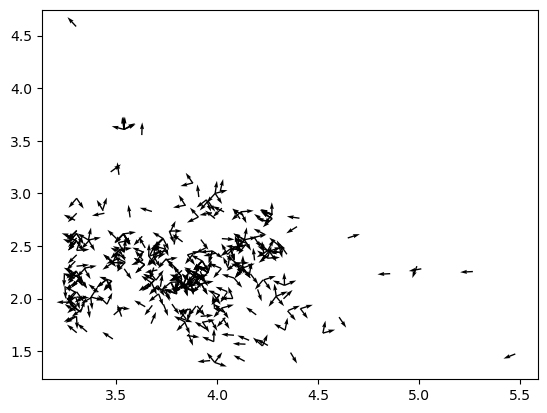

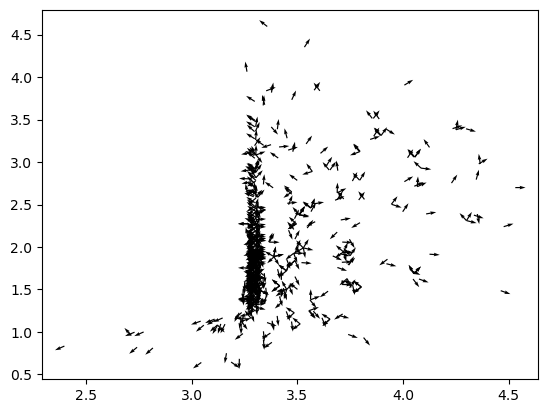

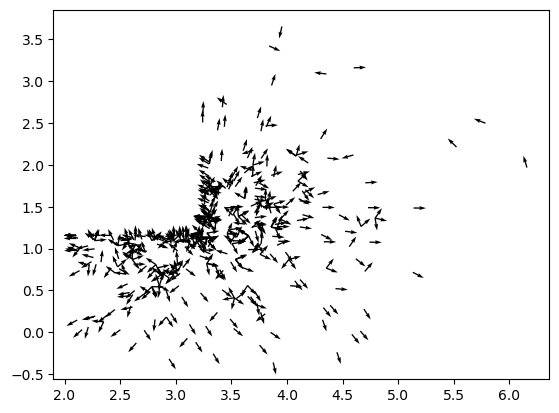

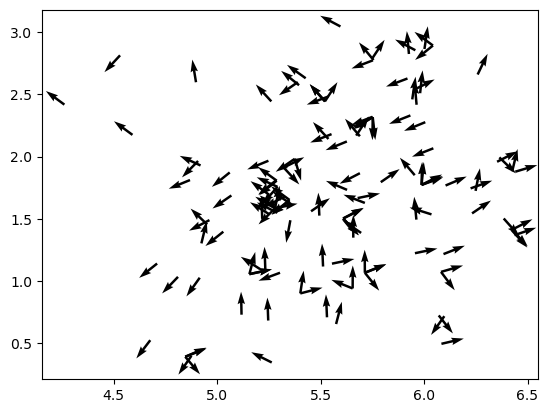

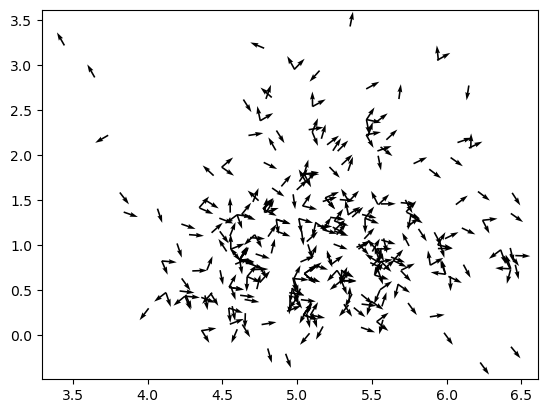

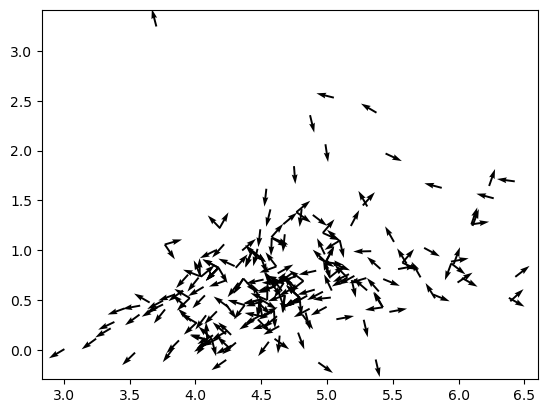

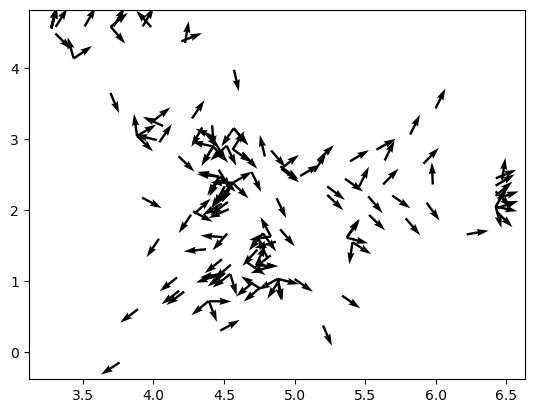

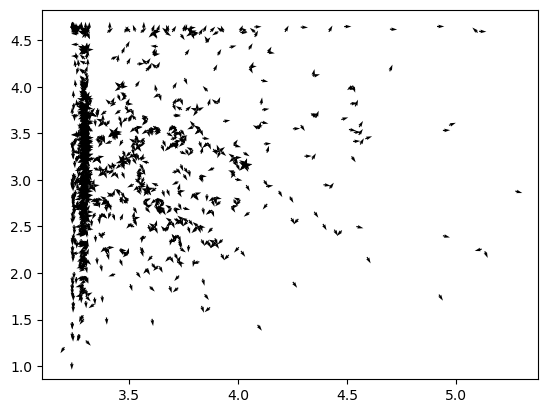

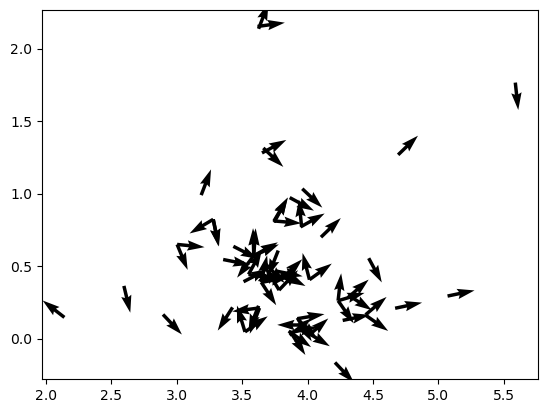

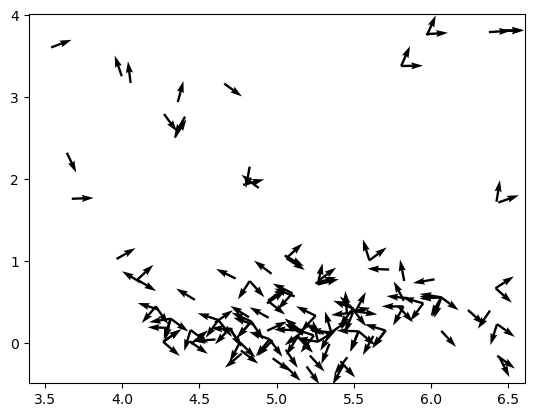

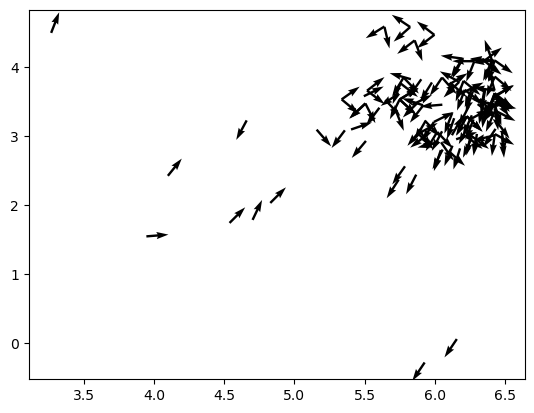

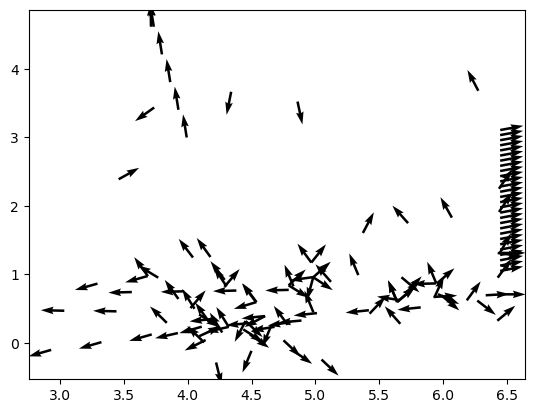

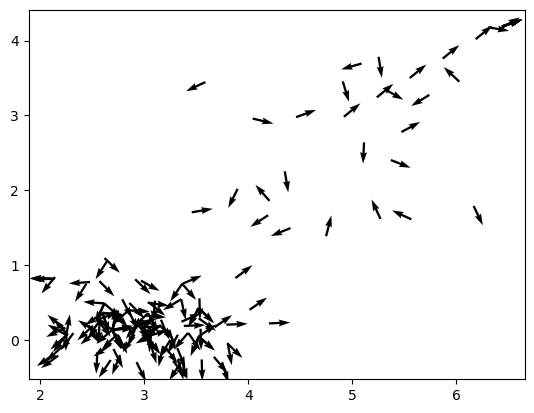

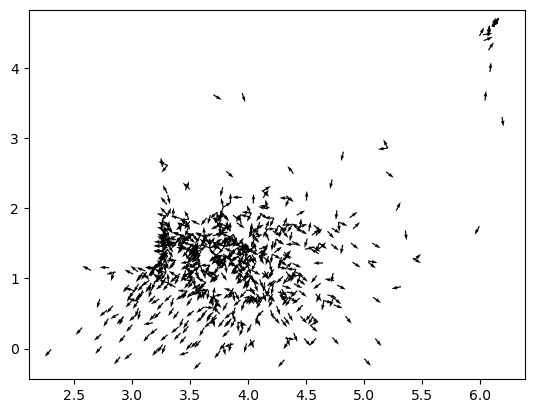

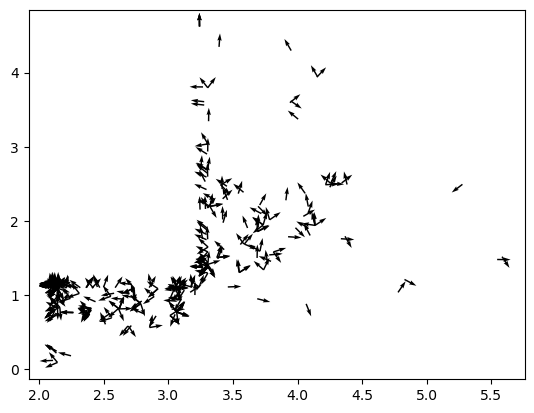

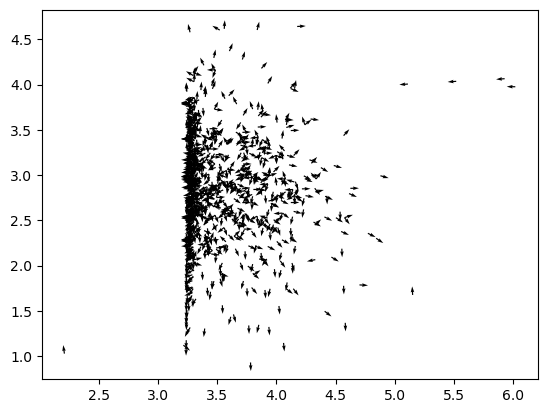

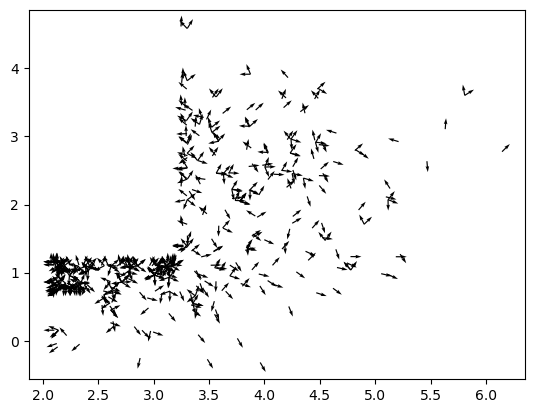

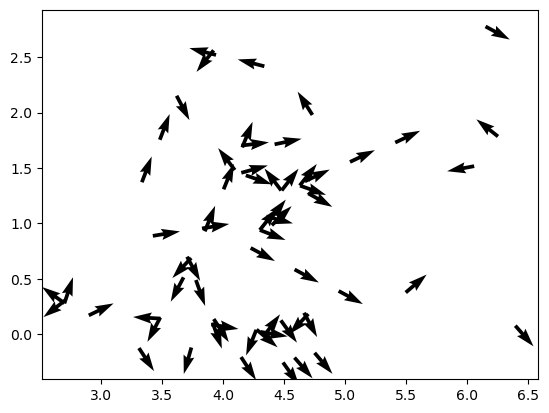

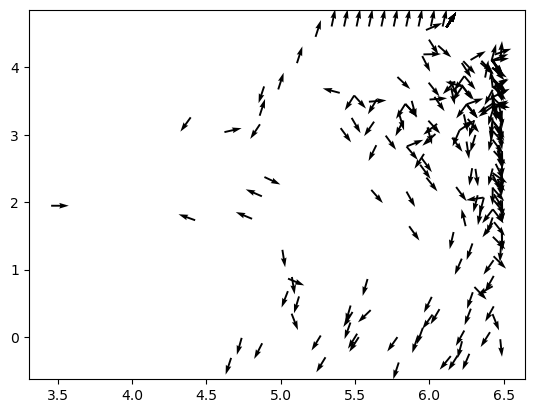

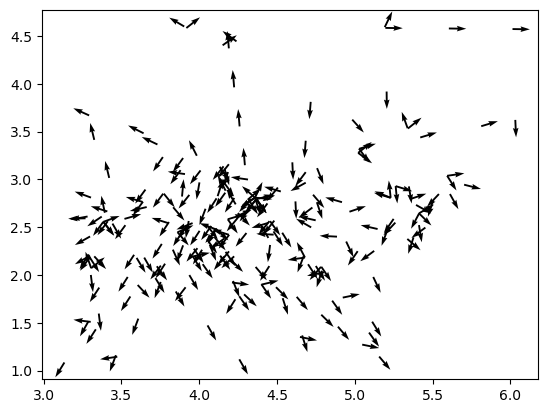

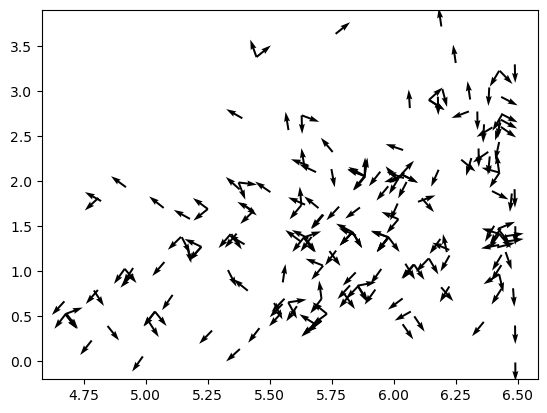

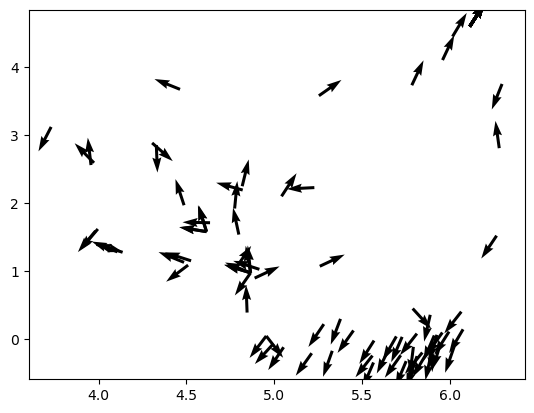

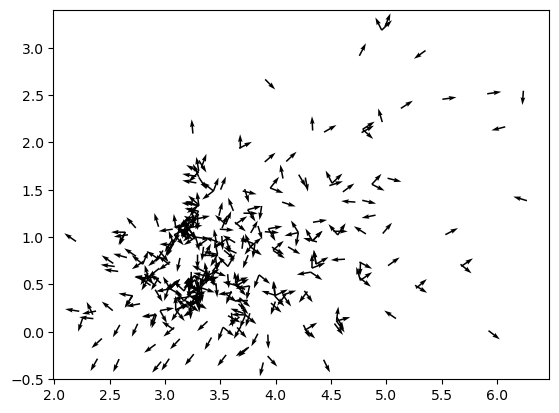

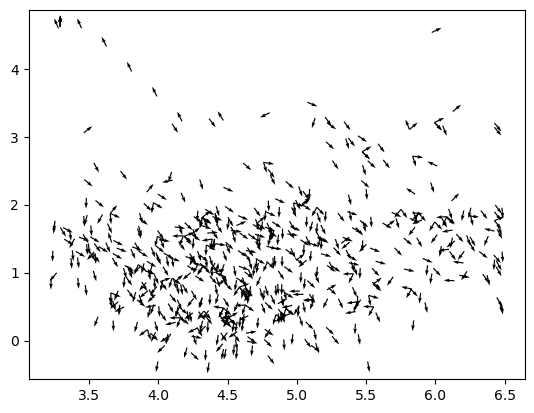

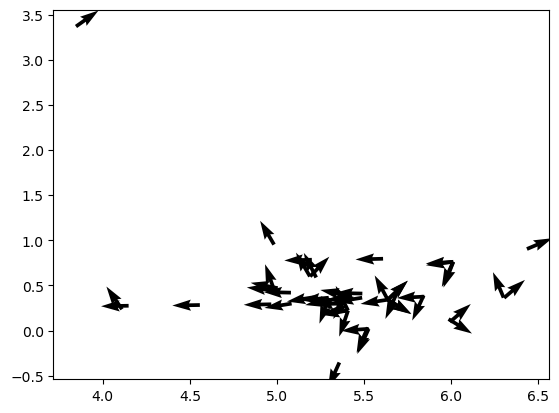

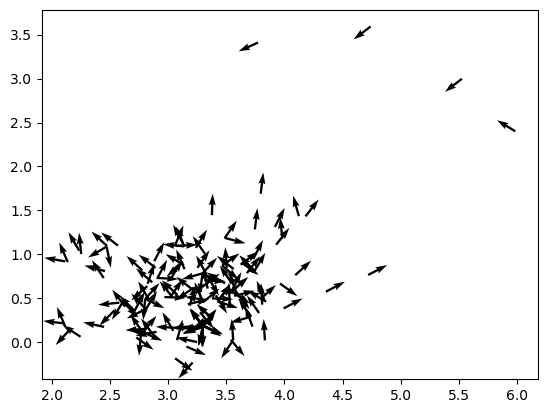

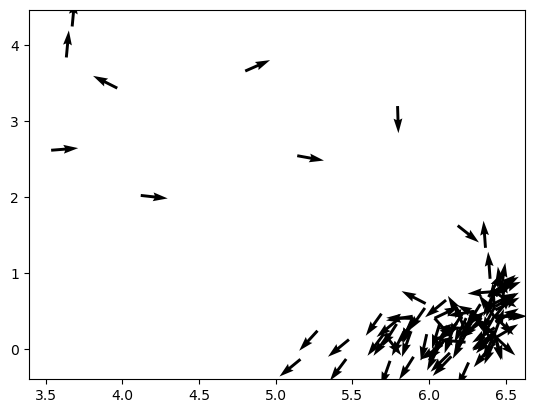

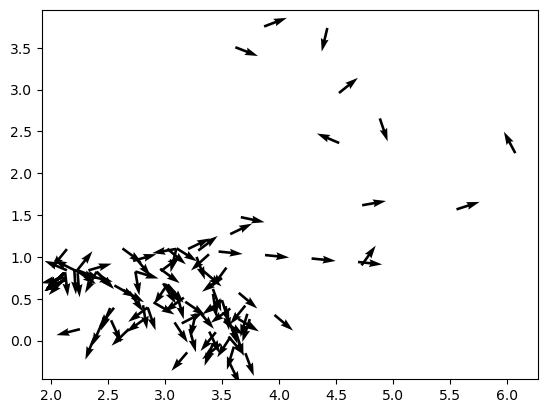

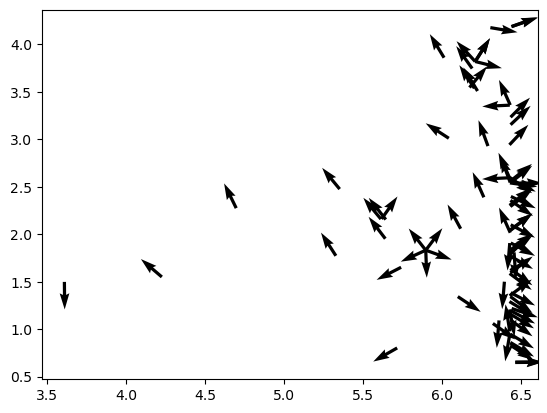

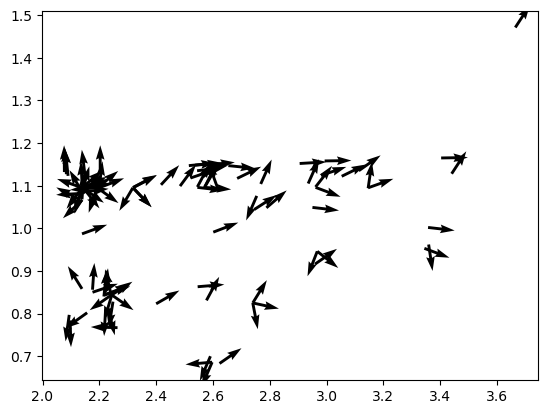

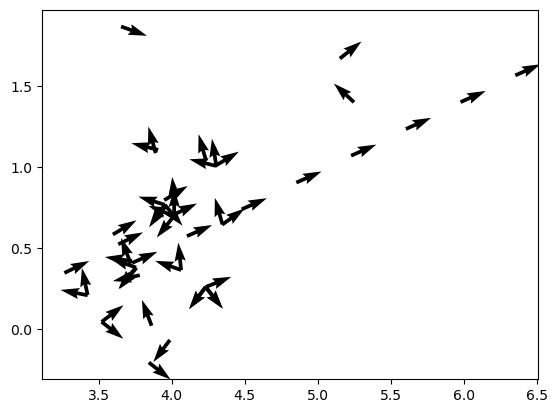

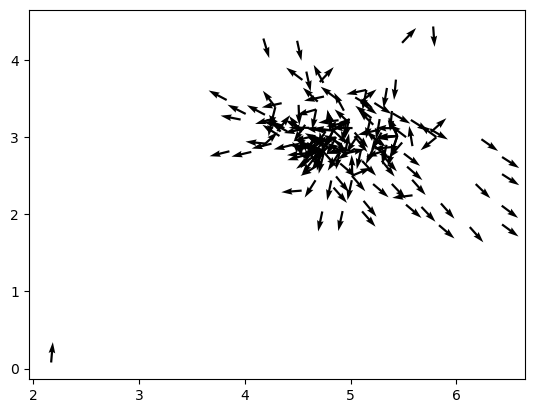

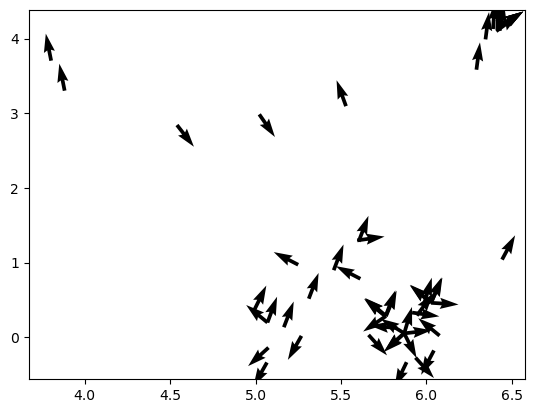

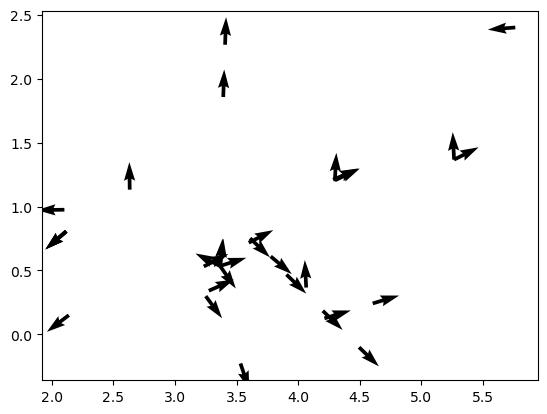

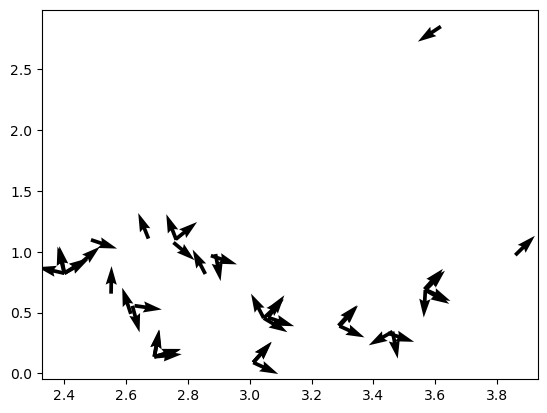

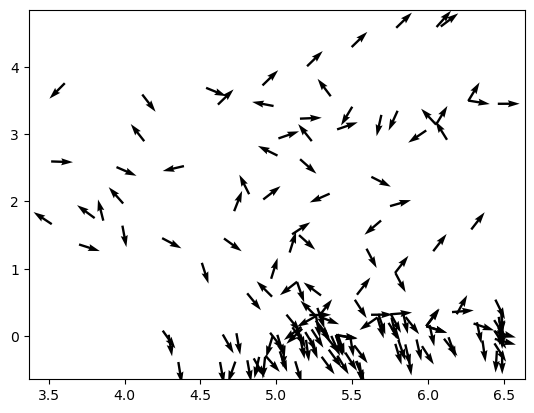

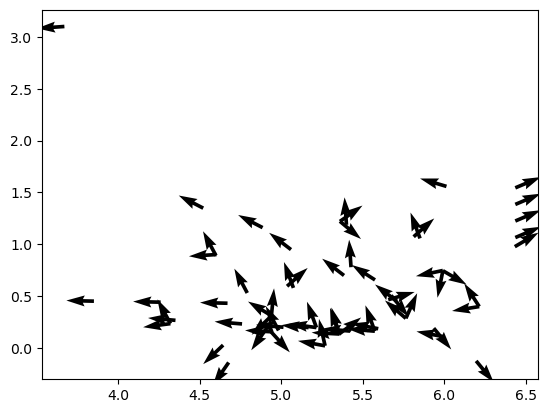

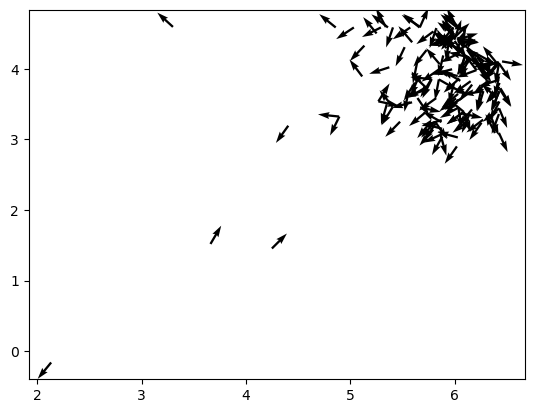

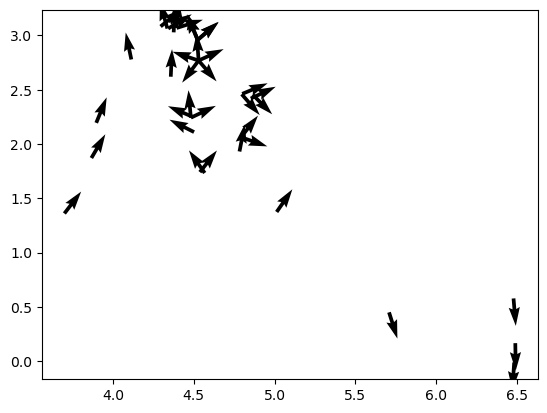

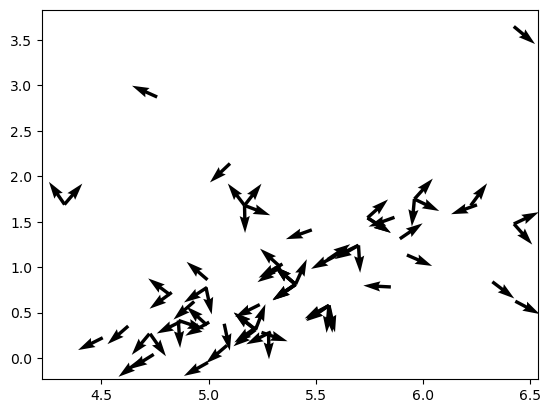

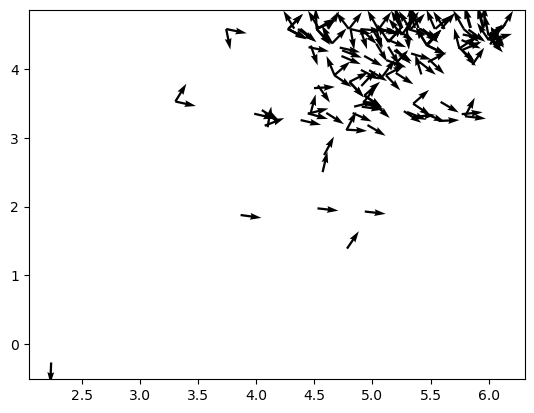

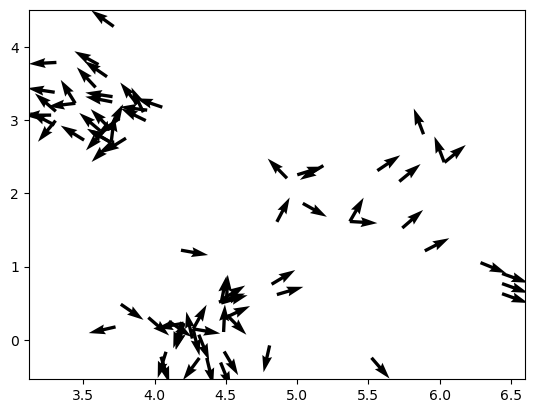

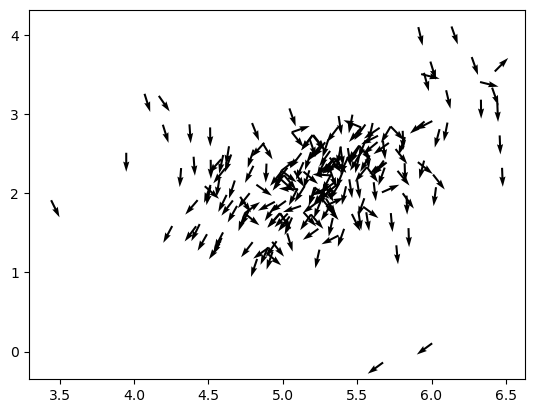

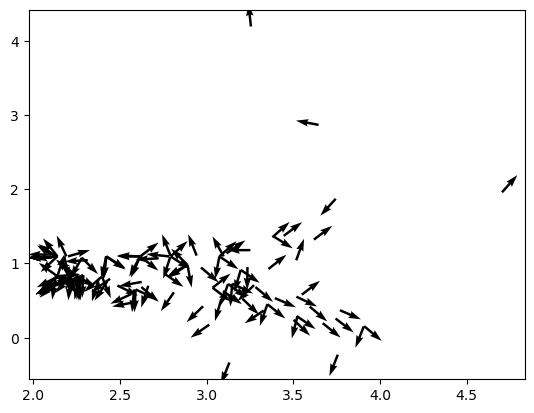

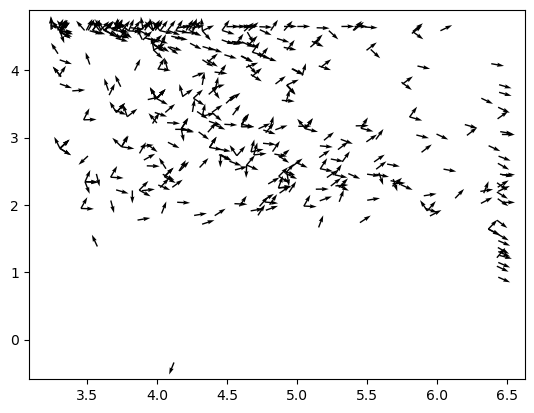

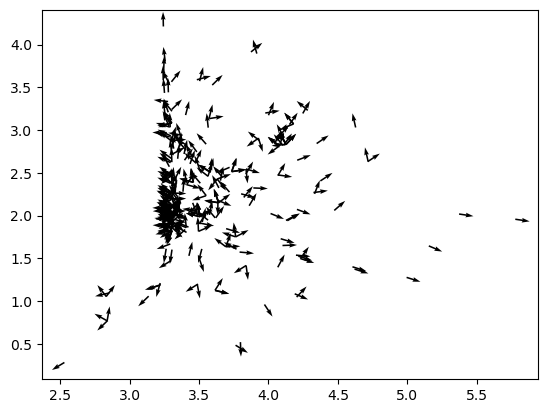

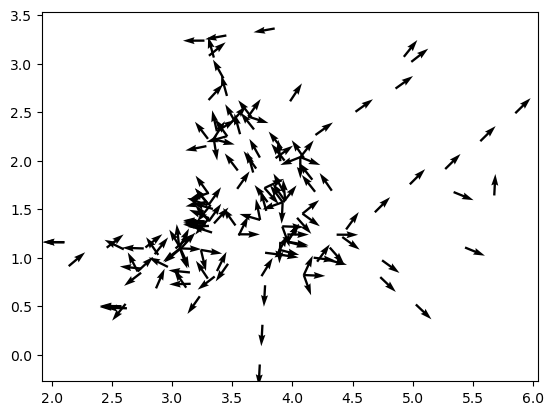

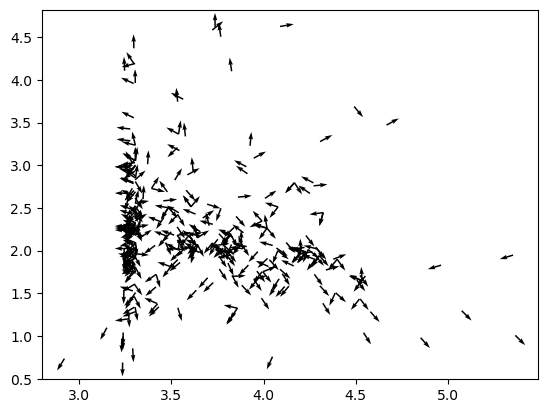

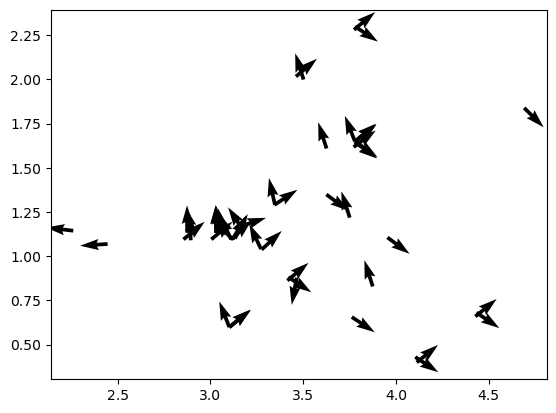

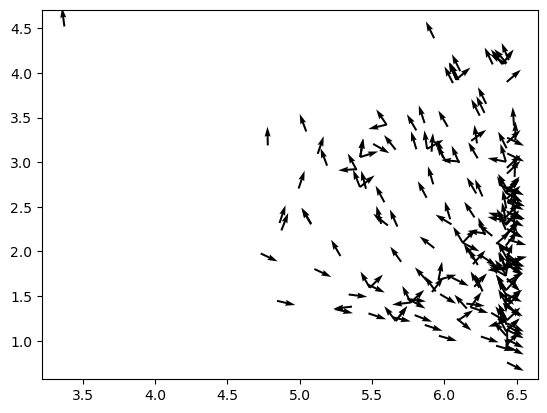

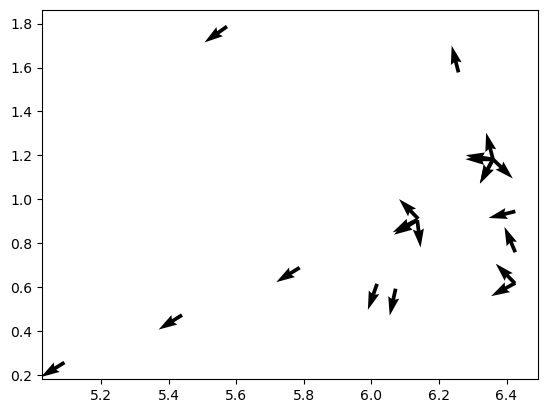

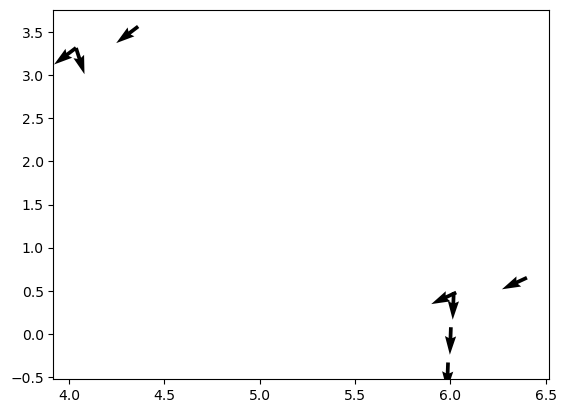

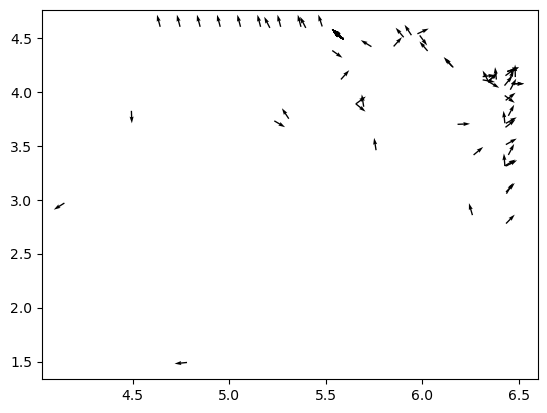

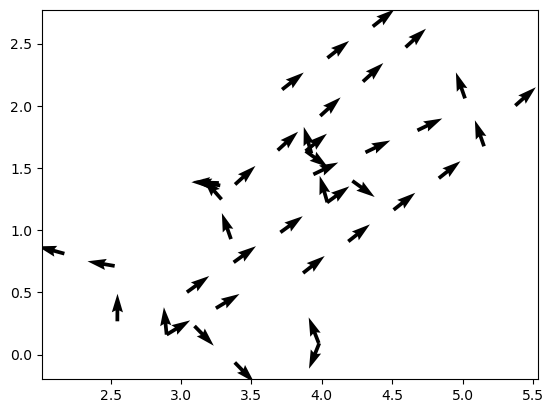

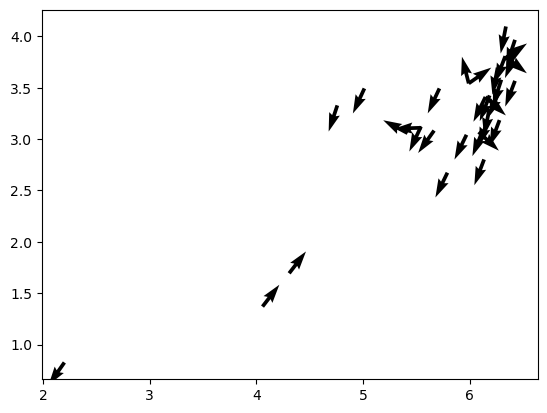

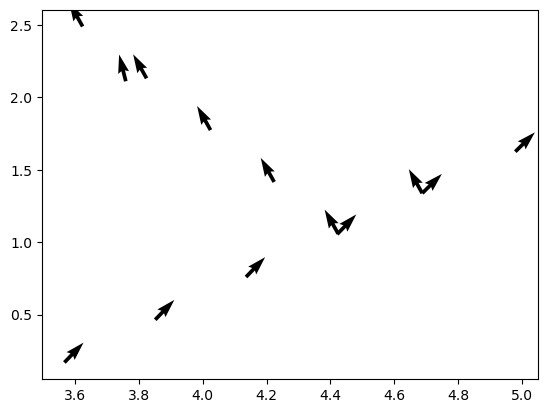

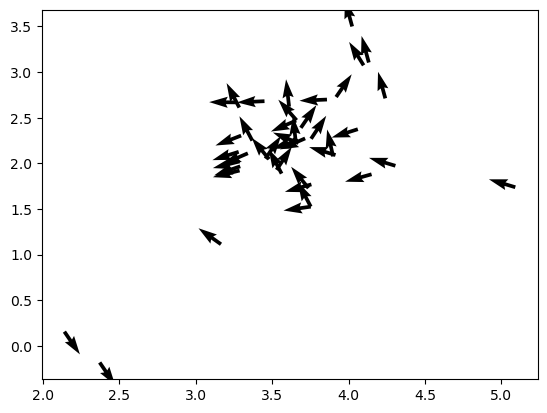

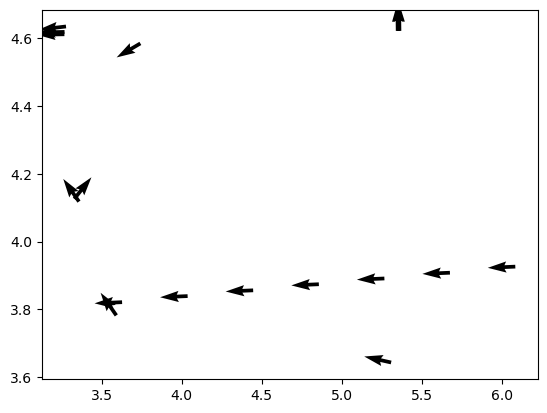

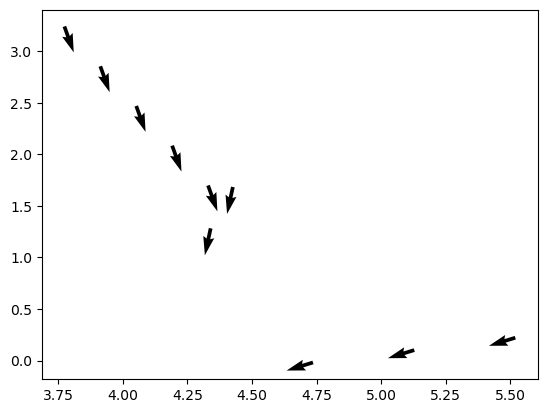

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pycircstat.descriptive import mean as cmean, resultant_vector_length
import numpy as np
df = pd.read_csv('data/statemaps2.txt')

figall, axall = plt.subplots()

allsids = np.unique(df['sid'])
for i in range(allsids.shape[0]):

    sid = allsids[i]
    subdf = df[df['sid'] == sid]
    x = subdf['x'].to_numpy()
    y = subdf['y'].to_numpy()
    a = subdf['rota'].to_numpy() * subdf['rotz'].to_numpy()
    xmu, ymu = x.mean(), y.mean()
    xstd, ystd = x.std(), y.std()
    amu = cmean(a)
    rmu = resultant_vector_length(a)
    # axall.scatter(xmu, ymu)
    r = 0.5 * rmu
    axall.arrow(xmu, ymu, r * np.cos(amu), r * np.sin(amu) , width =0.01, head_width=0.05)
    fig, ax = plt.subplots()
    ax.quiver(x, y, np.cos(a), np.sin(a))
    axall.set_xlim(-7, 7)
    axall.set_ylim(-3, 5)